**Wine Quality Predictor**

Dataset:winequality-red.csv


**Work Flow**:

Wine Data -> Data Analysis -> Data-Preprocessing ->Train-test split -> Random-forest Model 

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data Collection

In [2]:
wine_dataset = pd.read_csv("winequality-red.csv")

In [3]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualisation

In [5]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


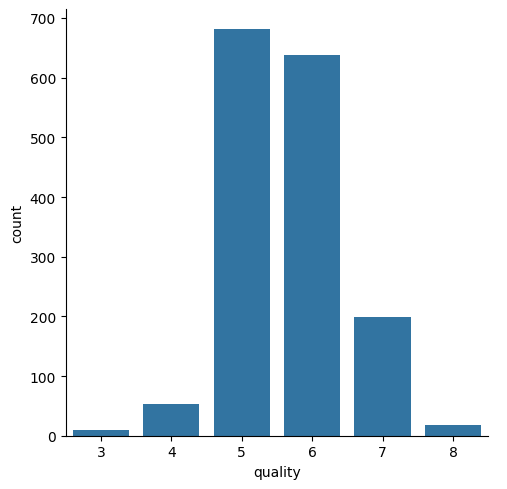

In [8]:
#number of values for each quality
sns.catplot(x='quality',data=wine_dataset,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

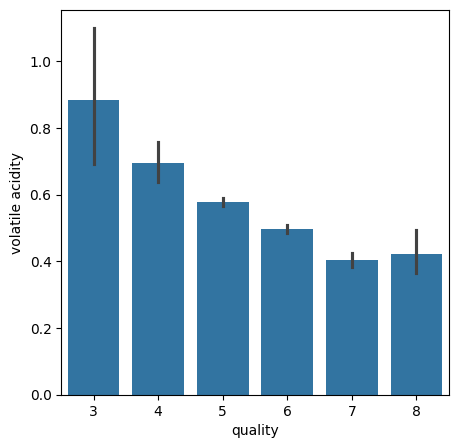

In [9]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

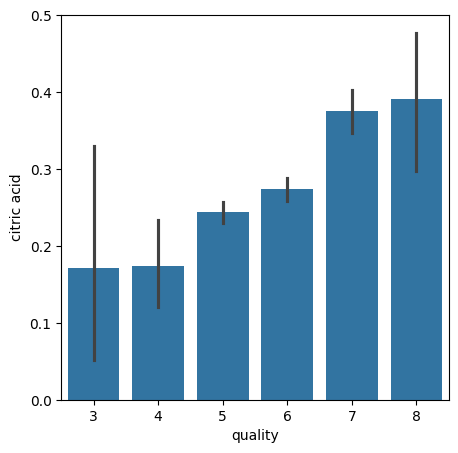

In [10]:
# citric acid content vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

Correlation of Columns

1) Positive Correlation

2) Negative Correlation

In [11]:
correlation = wine_dataset.corr()

<Axes: >

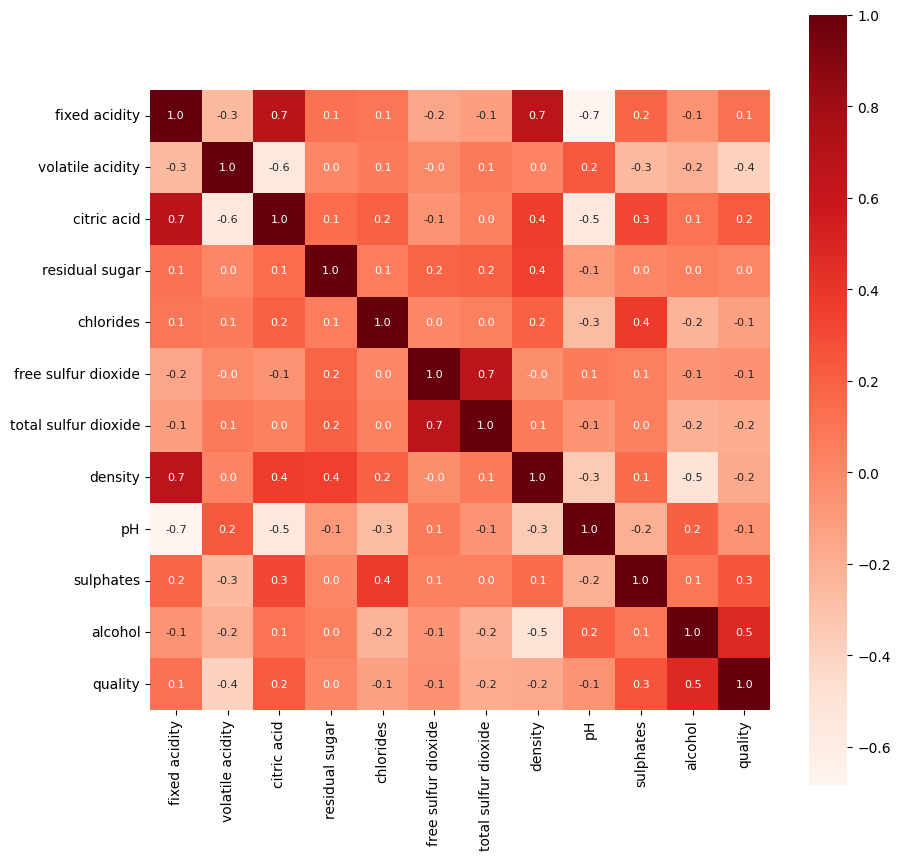

In [14]:
#constructing a heatmap tp understand the correlation betwen the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square= True, fmt ='.1f', annot = True, annot_kws={'size':8},cmap='Reds')

Data Pre-processing

In [16]:
#separating data and label
X = wine_dataset.drop(columns='quality',axis=1)
Y = wine_dataset['quality']

In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Label Binarization

In [19]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

In [20]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

Train -test Split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

Training our Model

**Random Forest Algorithm**

Single Decision Tree: Imp ML models
Node: Each node, connects to 2 or more branches.
Check for classwise or feature wise forward data.

Random Forest: Multiple Decision Trees
Mulitple results moderation.

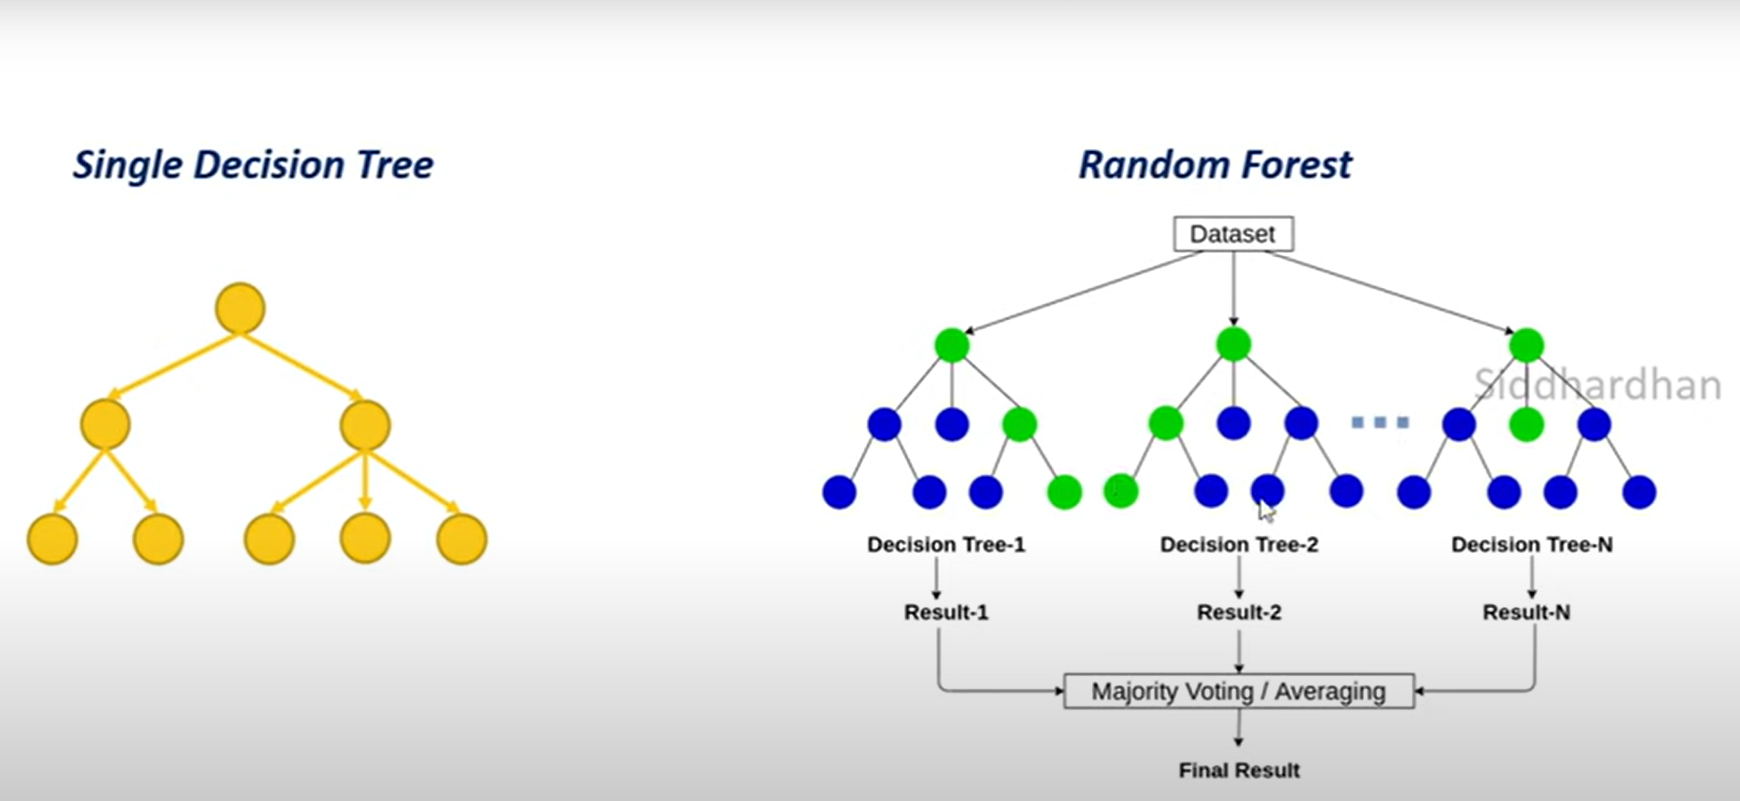



In [22]:
classifier = RandomForestClassifier()


In [23]:
classifier.fit(X_train,Y_train)

RandomForestClassifier()

Analysis of Model

In [24]:
X_train_prediction = classifier.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)
print(X_train_accuracy)

1.0


In [25]:
#test data accuracy
X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)
print(X_test_accuracy)

0.921875


Making of Classifer

In [26]:
X_input =(7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8)

#converting it into an numpy array
x_input_asnp = np.asanyarray(X_input)

#rehsaping the data
x_reshaped = x_input_asnp.reshape(1,-1)

prediction = classifier.predict(x_reshaped)
print(prediction[0])

if prediction[0]==0:
    print("The wine quality is not good")
else:
    print("The wine quality is good")


0
The wine quality is not good


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
X_input =(7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)

#converting it into an numpy array
x_input_asnp = np.asanyarray(X_input)

#rehsaping the data
x_reshaped = x_input_asnp.reshape(1,-1)

prediction = classifier.predict(x_reshaped)
print(prediction[0])

if prediction[0]==0:
    print("The wine quality is not good")
else:
    print("The wine quality is good")

1
The wine quality is good


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
